In [27]:
from scrape import scrapeBracket
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
driver = webdriver.Chrome('./chromedriver')

In [4]:
i = 7620
res = []
while len(res) < 10000:
    res.extend(scrapeBracket(driver, i))
    i -= 1
    print('{} games scraped from bracket {}'.format(len(res), i))

91 games scraped from bracket 7619
369 games scraped from bracket 7618
369 games scraped from bracket 7617
369 games scraped from bracket 7616
1972 games scraped from bracket 7615
3876 games scraped from bracket 7614
4617 games scraped from bracket 7613
5322 games scraped from bracket 7612
6401 games scraped from bracket 7611
6401 games scraped from bracket 7610
6401 games scraped from bracket 7609
7503 games scraped from bracket 7608
7503 games scraped from bracket 7607
7503 games scraped from bracket 7606
7945 games scraped from bracket 7605
7945 games scraped from bracket 7604
8098 games scraped from bracket 7603
8098 games scraped from bracket 7602
8238 games scraped from bracket 7601
8429 games scraped from bracket 7600
8521 games scraped from bracket 7599
8521 games scraped from bracket 7598
8708 games scraped from bracket 7597
8708 games scraped from bracket 7596
8808 games scraped from bracket 7595
8808 games scraped from bracket 7594
11764 games scraped from bracket 7593


In [5]:
score_totals = [sum(score) for score in res]
score_totals

[27,
 16,
 23,
 16,
 19,
 16,
 16,
 16,
 16,
 16,
 19,
 17,
 16,
 26,
 23,
 16,
 20,
 16,
 25,
 16,
 30,
 30,
 21,
 16,
 16,
 16,
 29,
 16,
 21,
 16,
 16,
 36,
 16,
 16,
 16,
 16,
 16,
 30,
 23,
 16,
 16,
 16,
 29,
 27,
 16,
 16,
 16,
 28,
 25,
 16,
 21,
 26,
 16,
 30,
 16,
 25,
 16,
 19,
 16,
 16,
 16,
 16,
 21,
 22,
 22,
 16,
 16,
 16,
 22,
 25,
 23,
 16,
 16,
 29,
 30,
 16,
 16,
 28,
 16,
 16,
 27,
 19,
 16,
 16,
 23,
 16,
 18,
 16,
 16,
 16,
 24,
 28,
 21,
 18,
 30,
 16,
 29,
 29,
 27,
 30,
 20,
 16,
 26,
 16,
 17,
 19,
 21,
 27,
 18,
 22,
 16,
 25,
 16,
 30,
 34,
 29,
 23,
 16,
 30,
 16,
 24,
 16,
 29,
 23,
 16,
 30,
 16,
 16,
 22,
 16,
 30,
 27,
 18,
 26,
 26,
 24,
 27,
 25,
 27,
 25,
 28,
 16,
 30,
 22,
 16,
 16,
 16,
 48,
 21,
 26,
 16,
 35,
 28,
 28,
 16,
 16,
 22,
 23,
 16,
 27,
 16,
 16,
 27,
 28,
 28,
 29,
 21,
 20,
 17,
 35,
 16,
 26,
 26,
 16,
 35,
 24,
 25,
 27,
 25,
 30,
 16,
 29,
 26,
 16,
 16,
 16,
 19,
 25,
 35,
 26,
 17,
 16,
 28,
 16,
 16,
 24,
 16,
 28,
 29,
 40,


In [6]:
def CountFrequency(my_list): 
    freq = {} 
    for items in my_list: 
        freq[items] = my_list.count(items) 
      
    return freq

In [7]:
score_frequency_dict = CountFrequency(score_totals)
score_frequency_dict[16] = score_frequency_dict[17]

In [8]:
cumulative_score_frequency_dict = {}
def get_total_below(num, score_frequency_dict):
    tot = 0
    for i in range(num):
        if i in score_frequency_dict:
            tot += score_frequency_dict[i]
    return tot

In [9]:
def convert_to_odds(freq):
    return 1 / freq

In [10]:
for i in range(20, 32):
    tot_below = get_total_below(i, score_frequency_dict)
    total = get_total_below(max(score_frequency_dict.keys()), score_frequency_dict)
    freq = tot_below / total
    print('Implied probability that score will be under {}: {}\n\tUnder odds: {}\n\tOver odds: {}'.format(i-.5, freq, convert_to_odds(freq), convert_to_odds(1-freq)))

Implied probability that score will be under 19.5: 0.1105620043673141
	Under odds: 9.044698544698544
	Over odds: 1.1243054658224576
Implied probability that score will be under 20.5: 0.15745316630272382
	Under odds: 6.351094890510949
	Over odds: 1.186877642886373
Implied probability that score will be under 21.5: 0.21664176531433169
	Under odds: 4.615915119363395
	Over odds: 1.2765551643192488
Implied probability that score will be under 22.5: 0.2833007700264337
	Under odds: 3.5298174442190673
	Over odds: 1.3952854393842207
Implied probability that score will be under 23.5: 0.35340765429261006
	Under odds: 2.8295934959349593
	Over odds: 1.546569498755777
Implied probability that score will be under 24.5: 0.42972072175611997
	Under odds: 2.3270928055629847
	Over odds: 1.7535268037081821
Implied probability that score will be under 25.5: 0.5035053442133088
	Under odds: 1.9860762383017576
	Over odds: 2.0141203703703705
Implied probability that score will be under 26.5: 0.5861395241926215


In [51]:
with open('out2.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['total score', 'probability of under', 'under odds', 'over odds'])
    total = get_total_below(max(score_frequency_dict.keys()), score_frequency_dict)
    for i in range(25, 29):
        tot_below = get_total_below(i, score_frequency_dict)
        freq = tot_below / total
        next_row = [i-.5, freq, convert_to_odds(freq), convert_to_odds(1-freq)]
        wr.writerow(next_row)

In [52]:
with open('out1.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['total score', 'fraction under total score', 'fraction over total score'])
    total = get_total_below(max(score_frequency_dict.keys()), score_frequency_dict)
    for i in range(25, 29):
        tot_below = get_total_below(i, score_frequency_dict)
        freq = tot_below / total
        next_row = [i-.5, freq, 1-freq]
        wr.writerow(next_row)

In [18]:
x = []
y = []
for i in range(15, 35):
    x.append(i)
    tot_below = get_total_below(i, score_frequency_dict)
    total = get_total_below(max(score_frequency_dict.keys()), score_frequency_dict)
    freq = tot_below / total
    y.append(freq)

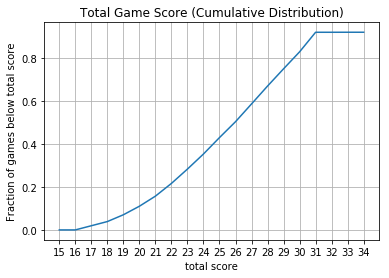

In [33]:
plt.plot(x,y)
plt.title('Total Game Score (Cumulative Distribution)')
plt.xlabel('total score')
plt.ylabel('Fraction of games below total score')
plt.xticks(np.arange(15, 35))
plt.grid()

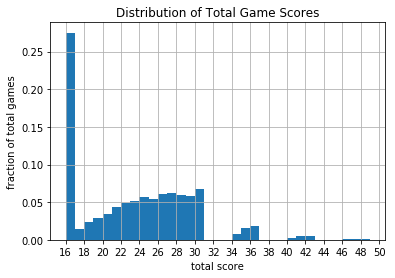

In [40]:
plt.hist(score_totals, bins=np.arange(16,50), density=True)
plt.title('Distribution of Total Game Scores')
plt.xlabel('total score')
plt.ylabel('fraction of total games')
plt.xticks(np.arange(16, 52, 2))
plt.grid()

In [44]:
# Create score_totals_trimmed, a copy of score_totals except the frequency of 16 matches the frequency of 17
score_totals_trimmed = [item for item in score_totals if item != 16]
score_totals_trimmed.extend([16]*score_totals.count(17))

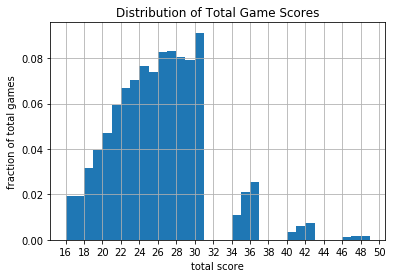

In [45]:
plt.hist(score_totals_trimmed, bins=np.arange(16,50), density=True)
plt.title('Distribution of Total Game Scores')
plt.xlabel('total score')
plt.ylabel('fraction of total games')
plt.xticks(np.arange(16, 52, 2))
plt.grid()

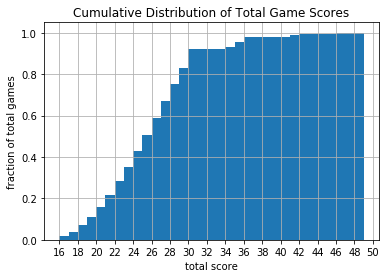

In [47]:
plt.hist(score_totals_trimmed, bins=np.arange(16,50), density=True, cumulative=True)
plt.title('Cumulative Distribution of Total Game Scores')
plt.xlabel('total score')
plt.ylabel('fraction of total games')
plt.xticks(np.arange(16, 52, 2))
plt.grid()